In [7]:
S0 = 1
mu, sigma = 0.05, 0.1
T, N = 3, 1000
dt = T / N

In [8]:
import numpy as np
Spath = np.zeros(shape=N+1)
Spath[0] = S0

for i in range(1, N+1):
    z = np.random.standard_normal()
    Spath[i] = Spath[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

print(Spath)

[1.         0.99766568 1.00514445 ... 1.38021039 1.37519137 1.3843546 ]


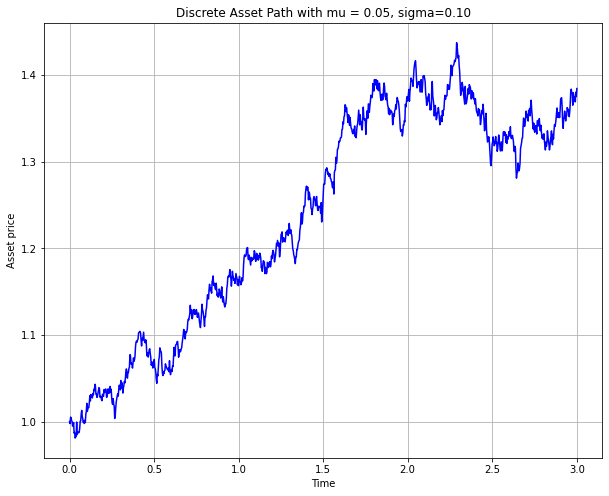

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
t = np.linspace(0, T, N+1)

plt.plot(t, Spath, color='b')
plt.xlabel('Time')
plt.ylabel('Asset price')
plt.grid(True)
plt.axis('tight')
plt.title('Discrete Asset Path with mu = %.2f, sigma=%.2f' %(mu, sigma))
plt.show()

In [26]:
mu, sigma = 0.2, 0.5

In [32]:
Spath_multi = np.zeros(shape=(10000, N+1))
Spath_multi[:, 0] = S0

for i in range(1, N+1):
    Z = np.random.standard_normal(size=10000)
    Spath_multi[:, i] = Spath_multi[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

print(Spath_multi)

[[1.         1.02767809 1.03113828 ... 1.19194296 1.20252748 1.17083711]
 [1.         1.02548202 1.02500914 ... 4.73696253 4.74774813 4.84887283]
 [1.         1.02243877 1.08571071 ... 1.78136909 1.84665599 1.81709519]
 ...
 [1.         1.01375734 1.02525631 ... 0.2876607  0.29579372 0.30381273]
 [1.         1.0322733  1.08108918 ... 2.44053815 2.45519456 2.45278921]
 [1.         0.97997104 1.01363323 ... 0.53338764 0.53169437 0.53397456]]


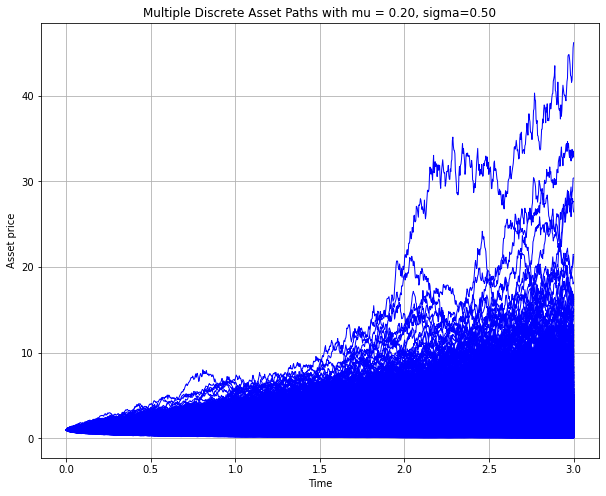

In [33]:
plt.figure(figsize=(10, 8))
t = np.linspace(0, T, N+1)

for i in range(Spath_multi.shape[0]):
    plt.plot(t, Spath_multi[i], color='b', linewidth=1.0)

plt.xlabel('Time')
plt.ylabel('Asset price')
plt.grid(True)
plt.axis('tight')
plt.title('Multiple Discrete Asset Paths with mu = %.2f, sigma=%.2f' %(mu, sigma))
plt.show()

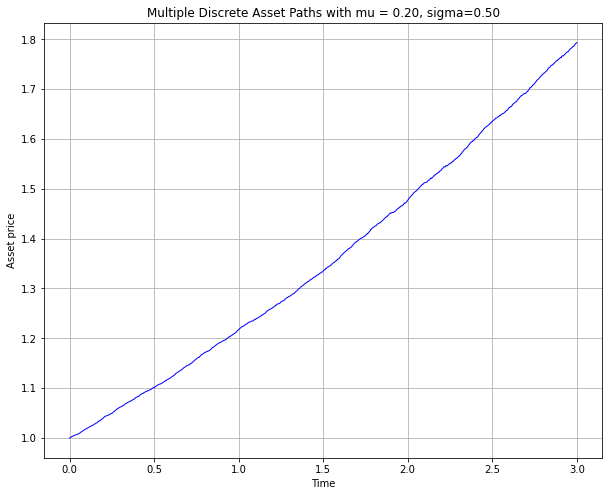

In [34]:
Spath_multi_mean = Spath_multi.mean(axis=0)

plt.figure(figsize=(10, 8))
plt.plot(t, Spath_multi_mean, color='b', linewidth=1.0)
plt.xlabel('Time')
plt.ylabel('Asset price')
plt.grid(True)
plt.axis('tight')
plt.title('Multiple Discrete Asset Paths with mu = %.2f, sigma=%.2f' %(mu, sigma))
plt.show()

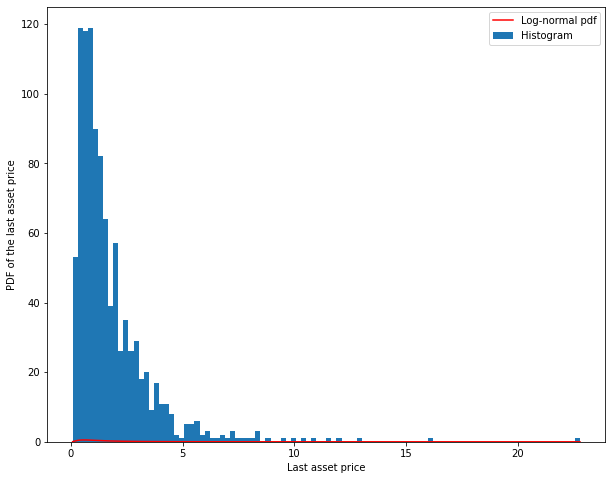

In [30]:
Spath_last = Spath_multi[:, N]

plt.figure(figsize=(10, 8))
count, bins, _ = plt.hist(Spath_last, 100, align='mid', label='Histogram')

x = np.linspace(min(bins), max(bins), 10000)
mu_S = np.log(S0) + (mu - 0.5 * sigma**2) * T
sigma_S = sigma * np.sqrt(T)
pdf = np.exp(-(np.log(x) - mu_S)**2 / (2 * sigma_S**2)) / (x * sigma_S * np.sqrt(2 * np.pi))

plt.plot(x, pdf, color='r', label='Log-normal pdf')
plt.xlabel('Last asset price')
plt.ylabel('PDF of the last asset price')
plt.axis('tight')
plt.legend(loc=0)
plt.show()